<a href="https://colab.research.google.com/github/hritik880/Fruit-Classification/blob/master/fruit_clasifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!cp /content/drive/'My Drive'/'Fruit-Images-Dataset-master (1)'.zip  /content
!unzip -q /content/'Fruit-Images-Dataset-master (1)'.zip

In [ ]:
!rm /content/'Fruit-Images-Dataset-master (1)'.zip

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten,Dropout, Lambda
from tensorflow.keras.optimizers import Adadelta, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train_folder = "/content/Fruit-Images-Dataset-master/Training"
test_folder = "/content/Fruit-Images-Dataset-master/Test"

In [ ]:
output_dir = r'/content/drive/My Drive/output_files_fruit/output_files'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [ ]:
labels = os.listdir(train_folder)
num_classes = len(labels)
print(num_classes)

131


In [ ]:
train_datagen = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator()

In [ ]:
train_gen = train_datagen.flow_from_directory(train_folder, target_size=(100,100), class_mode='sparse',
                                                  batch_size= 64, shuffle=True, subset='training', classes=labels)
test_gen = test_datagen.flow_from_directory(test_folder, target_size=(100,100), class_mode='sparse',
                                                batch_size= 64, shuffle=False, subset=None, classes=labels)

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [ ]:
train_gen.n

67692

In [ ]:
IMAGE_SIZE = 100
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same',kernel_initializer='he_uniform', activation='relu',input_shape = IMG_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same',kernel_initializer='he_uniform', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))


model.add(tf.keras.layers.Conv2D(128, (3, 3), kernel_initializer='he_uniform', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(256, (3, 3), kernel_initializer='he_uniform', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(131, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 256)         2

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=4, verbose=1,
                                                factor=0.1, min_lr=0.00001)
save_model = ModelCheckpoint(filepath=output_dir + "/model.h5", monitor='val_loss', verbose=1,
                                 save_best_only=True, save_weights_only=False, mode='min', save_freq='epoch')

In [ ]:
batch_size = 64
history=  model.fit(train_gen,
                    epochs=15,
                    steps_per_epoch=(train_gen.n // batch_size) + 1,
                    validation_data = test_gen,
                    validation_steps = (test_gen.n // batch_size),
                    verbose =1 ,
                    callbacks=[learning_rate_reduction, save_model])

Epoch 1/15
1058/1058 [==============================] - ETA: 0s - loss: 4.5632 - accuracy: 0.4088
Epoch 00001: val_loss improved from inf to 0.78525, saving model to /content/drive/My Drive/output_files_fruit/output_files/model.h5
1058/1058 [==============================] - 179s 169ms/step - loss: 4.5632 - accuracy: 0.4088 - val_loss: 0.7852 - val_accuracy: 0.7959 - lr: 0.0010
Epoch 2/15
1058/1058 [==============================] - ETA: 0s - loss: 0.5976 - accuracy: 0.8202
Epoch 00002: val_loss improved from 0.78525 to 0.44457, saving model to /content/drive/My Drive/output_files_fruit/output_files/model.h5
1058/1058 [==============================] - 178s 168ms/step - loss: 0.5976 - accuracy: 0.8202 - val_loss: 0.4446 - val_accuracy: 0.8887 - lr: 0.0010
Epoch 3/15
1058/1058 [==============================] - ETA: 0s - loss: 0.3890 - accuracy: 0.8854
Epoch 00003: val_loss improved from 0.44457 to 0.38568, saving model to /content/drive/My Drive/output_files_fruit/output_files/model.h5

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


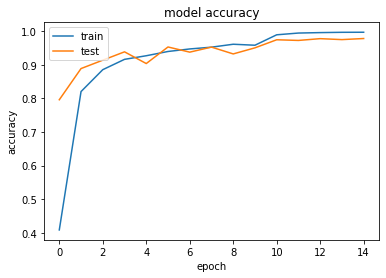

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

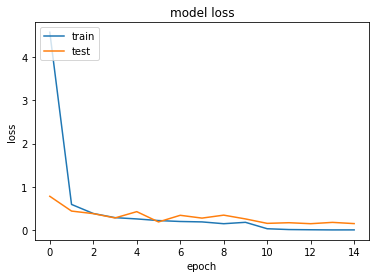

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.load_weights((output_dir + "/model.h5"))

In [ ]:
train_gen.reset()
test_gen.reset()

In [ ]:
verbose = 1
loss_t, accuracy_t = model.evaluate(train_gen, steps=(train_gen.n // batch_size), verbose=verbose)
loss, accuracy = model.evaluate(test_gen, steps=(test_gen.n // batch_size) , verbose=verbose)
print("Train: accuracy = %f  ;  loss_v = %f" % (accuracy_t, loss_t))
print("Test: accuracy = %f  ;  loss_v = %f" % (accuracy, loss))

354/354 [==============================] - 11s 31ms/step - loss: 0.1469 - accuracy: 0.9796
Train: accuracy = 0.999675  ;  loss_v = 0.001185
Test: accuracy = 0.979608  ;  loss_v = 0.146898


In [ ]:
y_pred = model.predict(test_gen, steps=(test_gen.n // batch_size)+1, verbose=verbose)
y_true = test_gen.classes[test_gen.index_array]
 

355/355 [==============================] - 11s 31ms/step


In [ ]:
y_pred_int = np.argmax(y_pred,axis =1)

In [ ]:
y_true

array([  0,   0,   0, ..., 130, 130, 130], dtype=int32)

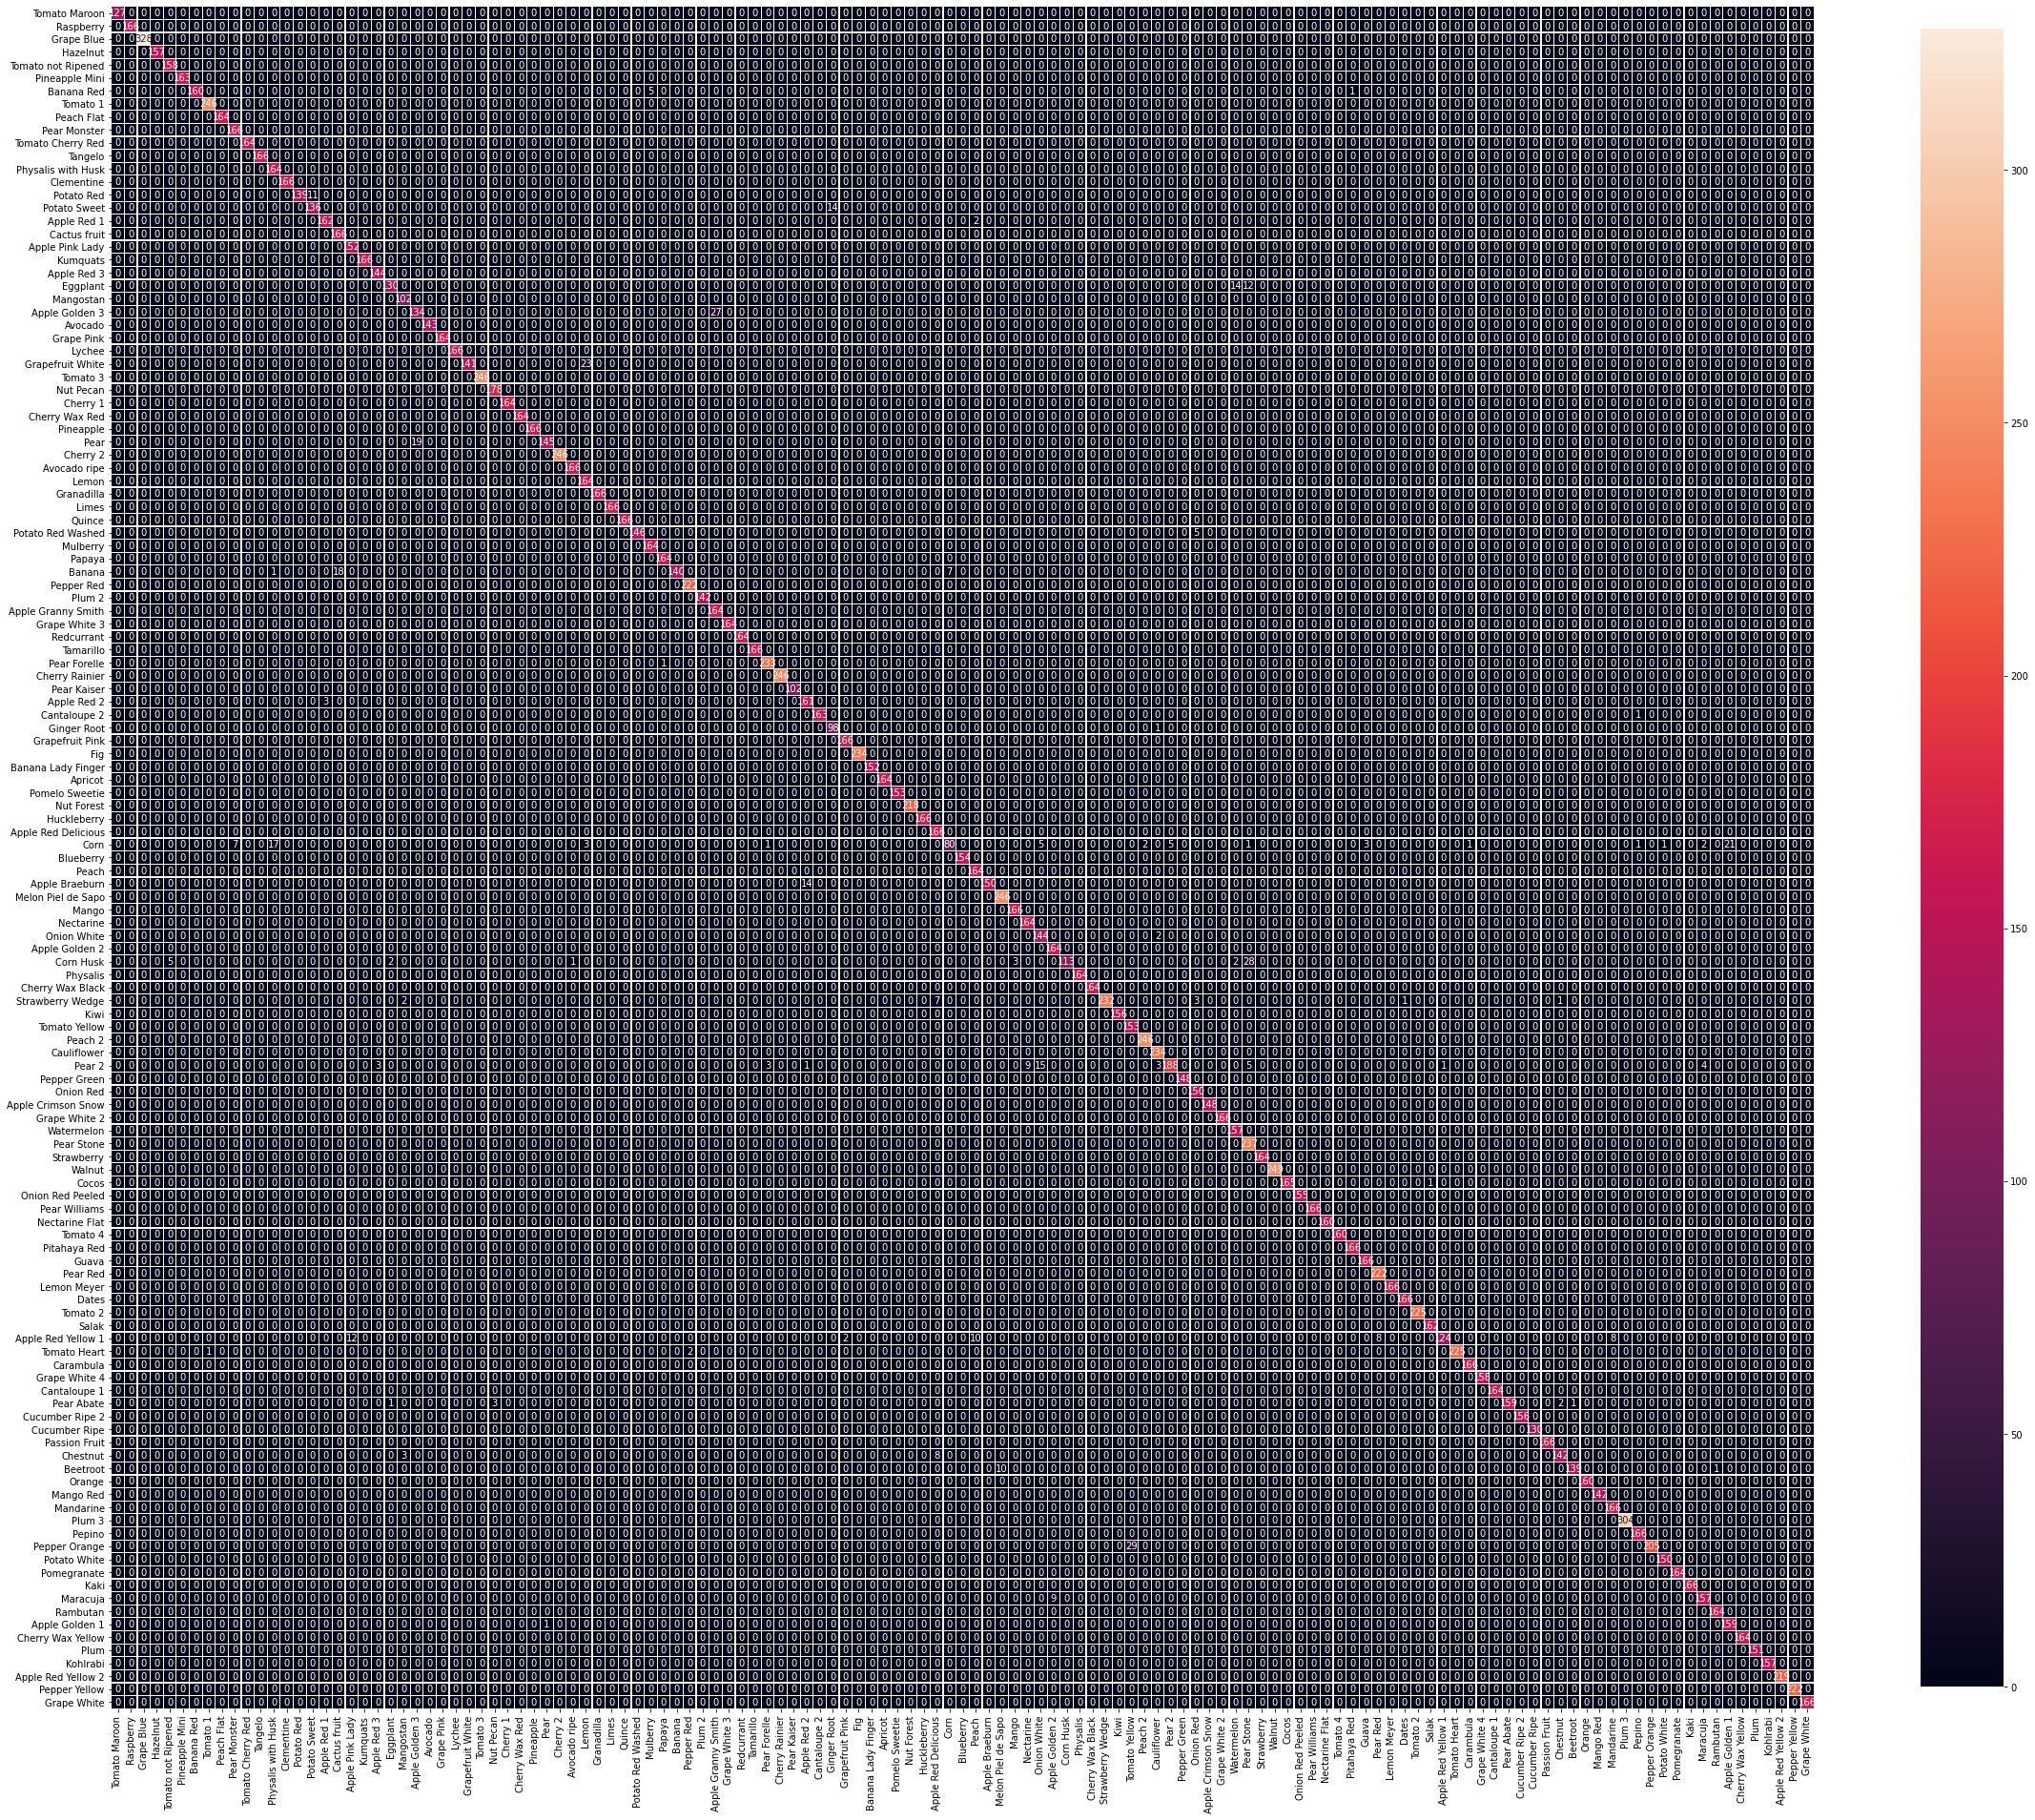

In [ ]:
cm = confusion_matrix(y_true, y_pred_int)
classes = labels
df_cm = pd.DataFrame(cm, index=[i for i in classes], columns=[i for i in classes])
plt.figure(figsize=(40, 40))
ax = sns.heatmap(df_cm, annot=True, square=True, fmt="d", linewidths=.2, cbar_kws={"shrink": 0.8})
if output_dir:
    plt.savefig(output_dir + "/confusion_matrix.png")

In [ ]:
class_report = classification_report(y_true, y_pred.argmax(axis=-1), target_names=labels ,output_dict=True)

In [ ]:
print(class_report)

{'Tomato Maroon': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 127}, 'Raspberry': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 166}, 'Grape Blue': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 328}, 'Hazelnut': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 157}, 'Tomato not Ripened': {'precision': 0.9693251533742331, 'recall': 1.0, 'f1-score': 0.9844236760124611, 'support': 158}, 'Pineapple Mini': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 163}, 'Banana Red': {'precision': 1.0, 'recall': 0.963855421686747, 'f1-score': 0.9815950920245399, 'support': 166}, 'Tomato 1': {'precision': 0.9959514170040485, 'recall': 1.0, 'f1-score': 0.9979716024340771, 'support': 246}, 'Peach Flat': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 164}, 'Pear Monster': {'precision': 0.9595375722543352, 'recall': 1.0, 'f1-score': 0.9793510324483776, 'support': 166}, 'Tomato Cherry Red': {'precision': 1.0, 'recall'

In [ ]:
df = pd.DataFrame(class_report).transpose()
df.to_csv(output_dir + '/classification_report')